In [65]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
%matplotlib inline

**Data loading**

In [66]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
heart_disease_data = heart_disease.data.features 
target = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [67]:
# Load your data
#heart_disease_data = pd.read_csv('heart.csv')

In [68]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [69]:
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


**Data formatting and cleaning**

*Renaming the columns with more meaningful names*

In [70]:
# Define a dictionary for renaming the columns
renaming_dict = {
    'age': 'age',
    'sex': 'gender',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'serum_cholesterol_mg_per_dl',
    'fbs': 'fasting_blood_sugar_gt_120_mg_per_dl',
    'restecg': 'resting_ecg_results',
    'thalach': 'maximum_heart_rate_achieved',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression_induced_by_exercise_relative_to_rest',
    'slope': 'slope_of_peak_exercise_st_segment',
    'ca': 'number_of_major_vessels_colored_by_flourosopy',
    'thal': 'thalassemia',
    'target': 'diagnosis_of_heart_disease'
}

# Code to rename the columns
heart_disease_data_renamed = heart_disease_data.rename(columns=renaming_dict)

*Checking for missing values*

In [71]:
from sklearn.impute import KNNImputer

# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values using K-Nearest Neighbors
heart_disease_data_imputed = pd.DataFrame(imputer.fit_transform(heart_disease_data_renamed),
                                          columns=heart_disease_data_renamed.columns)

# Check if there are any missing values left
missing_values_after_imputation = heart_disease_data_imputed.isnull().sum()

heart_disease_data_imputed.head(), missing_values_after_imputation


(    age  gender  chest_pain_type  resting_blood_pressure  \
 0  63.0     1.0              1.0                   145.0   
 1  67.0     1.0              4.0                   160.0   
 2  67.0     1.0              4.0                   120.0   
 3  37.0     1.0              3.0                   130.0   
 4  41.0     0.0              2.0                   130.0   
 
    serum_cholesterol_mg_per_dl  fasting_blood_sugar_gt_120_mg_per_dl  \
 0                        233.0                                   1.0   
 1                        286.0                                   0.0   
 2                        229.0                                   0.0   
 3                        250.0                                   0.0   
 4                        204.0                                   0.0   
 
    resting_ecg_results  maximum_heart_rate_achieved  exercise_induced_angina  \
 0                  2.0                        150.0                      0.0   
 1                  2.0       

## Preprocessing

In [72]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns
categorical_cols = heart_disease_data_imputed.select_dtypes(include=['object', 'category']).columns
numerical_cols = heart_disease_data_imputed.select_dtypes(include=['int64', 'float64']).columns

# Create a transformer for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Apply transformations to the dataset
heart_disease_data_preprocessed = preprocessor.fit_transform(heart_disease_data_imputed)

## Modeling

In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#target = heart_disease_data_imputed['diagnosis_of_heart_disease'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(heart_disease_data_preprocessed, target, test_size=0.3, random_state=20)

In [74]:
# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    # Add other parameters here
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


C:\Users\alexs\PycharmProjects\PfDa_Project_S7\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\alexs\PycharmProjects\PfDa_Project_S7\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\alexs\PycharmProjects\PfDa_Project_S7\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\alexs\PycharmProjects\PfDa_Project_S7\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: 

0.6043956043956044

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [76]:
m1="Logistic Regression"
lr_model = LogisticRegression(solver="liblinear",random_state=2 )
# training the model with training data
lr_model.fit(X_train, y_train)
# Accuracy on training data
X_train_prediction = lr_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_prediction = lr_model.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_lr*100)

#Confussion matrix
LR_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(LR_conf_matrix)

Accuracy on Training data:  67.9245283018868
Accuracy on Test data:  56.043956043956044
Confussion matrix
[[45  2  0  2  0]
 [ 7  1  3  5  0]
 [ 3  3  2  4  0]
 [ 2  2  1  3  0]
 [ 1  2  1  2  0]]


C:\Users\alexs\PycharmProjects\PfDa_Project_S7\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Naive Bayes

In [77]:
m2="Naive Bayes"

nb = GaussianNB()
# training the model with training data
nb.fit(X_train,y_train)
# Accuracy on training data
X_train_prediction = nb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_prediction = nb.predict(X_test)
test_data_accuracy_nb = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_nb*100)

#Confussion matrix
nb_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(nb_conf_matrix)

Accuracy on Training data:  64.62264150943396
Accuracy on Test data:  47.25274725274725
Confussion matrix
[[35 11  2  1  0]
 [ 5  3  4  4  0]
 [ 0  5  2  4  1]
 [ 2  1  3  2  0]
 [ 0  2  1  2  1]]


C:\Users\alexs\PycharmProjects\PfDa_Project_S7\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Random Forest

In [78]:
m3="Random Forest"
rf = RandomForestClassifier(n_estimators=100, criterion="entropy",max_depth=7, min_samples_leaf=2, max_features="sqrt",random_state=2)  
# training the model with training data
rf.fit(X_train,y_train)
# Accuracy on training data
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)

# Accuracy on test data
X_test_prediction = rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_rf*100)

#Confussion matrix
rf_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(rf_conf_matrix)

C:\Users\alexs\PycharmProjects\PfDa_Project_S7\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy on Training data:  92.9245283018868
Accuracy on Test data:  59.34065934065934
Confussion matrix
[[46  1  1  1  0]
 [ 6  3  1  6  0]
 [ 5  1  3  3  0]
 [ 3  2  1  2  0]
 [ 1  0  1  4  0]]


## Gradient Boosting

In [79]:
m4="Extreme Gradient Boost"
Egb = GradientBoostingClassifier(n_estimators=100, subsample= 0.2, min_samples_leaf=2,max_depth=5,random_state=2,max_features="sqrt")
# training the model with training data
Egb.fit(X_train,y_train)
# Accuracy on training data
X_train_prediction = Egb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_prediction = Egb.predict(X_test)
test_data_accuracy_egb = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_egb*100)

#Confussion matrix
Egb_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(Egb_conf_matrix)

C:\Users\alexs\PycharmProjects\PfDa_Project_S7\venv\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on Training data:  96.22641509433963
Accuracy on Test data:  59.34065934065934
Confussion matrix
[[44  2  1  1  1]
 [ 8  2  1  5  0]
 [ 2  1  6  3  0]
 [ 3  1  2  2  0]
 [ 1  1  1  3  0]]


## KNN

In [80]:
m5="K-Neighbour"
knn = KNeighborsClassifier(n_neighbors=20, algorithm="auto" )
# train on the training set
knn.fit(X_train, y_train)
# Accuracy on training data
X_train_predict= knn.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= knn.predict(X_test)
test_data_accuracy_knn=accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_knn*100)
#Confussion matrix
knn_confusion_matrix=  confusion_matrix(y_test,X_test_predict)
print("Confusion Matrix")
print(knn_confusion_matrix)

Accuracy on Training data:  61.79245283018868
Accuracy on Test data:  60.43956043956044
Confusion Matrix
[[47  1  1  0  0]
 [ 8  5  1  2  0]
 [ 3  5  1  3  0]
 [ 2  4  0  2  0]
 [ 1  2  1  2  0]]


C:\Users\alexs\PycharmProjects\PfDa_Project_S7\venv\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## SVC

In [81]:
m6="svc"
svc = SVC(C=5,kernel="rbf")
svc.fit(X_train, y_train)
# Accuracy on training data
X_train_predict= svc.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= svc.predict(X_test)
test_data_accuracy_svc=accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_svc*100)
#Confussion matrix
knn_confusion_matrix =  confusion_matrix(y_test,X_test_predict)
print("Confusion Matrix")
print(knn_confusion_matrix)

Accuracy on Training data:  95.28301886792453
Accuracy on Test data:  56.043956043956044
Confusion Matrix
[[44  3  2  0  0]
 [ 6  3  3  4  0]
 [ 5  5  1  1  0]
 [ 2  0  3  3  0]
 [ 1  2  1  2  0]]


C:\Users\alexs\PycharmProjects\PfDa_Project_S7\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Comparing the models

In [82]:
results = {"Models": [m1, m2, m3 ,m4, m5, m6],
           "Accuracy": [test_data_accuracy_lr, test_data_accuracy_nb, test_data_accuracy_rf,test_data_accuracy_egb, test_data_accuracy_knn, test_data_accuracy_svc]}
    
for (key, value) in results.items():
    if key=="Accuracy":
        results[key]=  [item*100 for item in results[key]]

    
result_df=pd.DataFrame(results)

In [83]:
result_df

,Models,Accuracy
0,Logistic Regression,56.043956
1,Naive Bayes,47.252747
2,Random Forest,59.340659
3,Extreme Gradient Boost,59.340659
4,K-Neighbour,60.439560
5,svc,56.043956


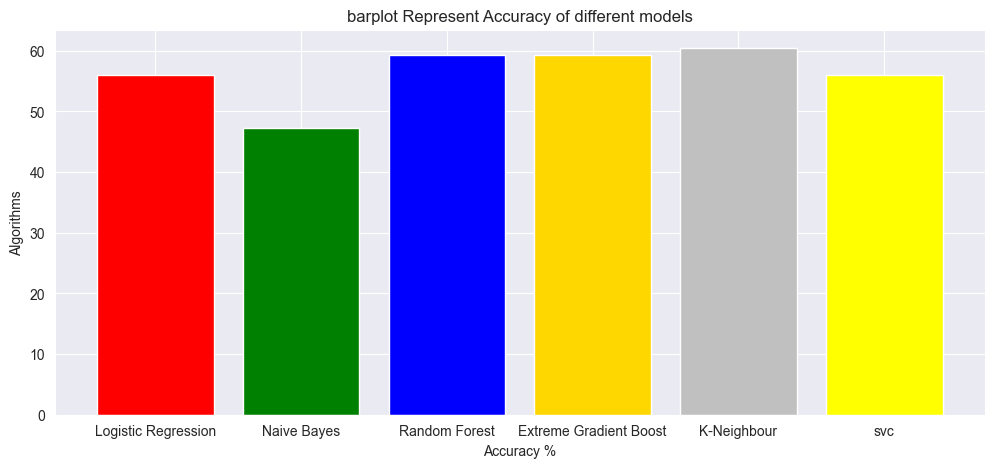

In [84]:
colors = ['red','green','blue','gold','silver','yellow']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(result_df['Models'],result_df['Accuracy'],color = colors)
plt.show()